In [94]:

from radial_density import RadialDensity
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle
from scipy.integrate import simpson
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\\usepackage{amsmath,bm}')
matplotlib.rcParams.update({'font.size': 18})



In [97]:
# load the angle density data
indata = pickle.load(open("angle_density_data.pickle","rb"))
stz_grid = indata['stz_grid']
thetas = indata['thetas']
zetas = indata['zetas']
s_label = indata['s_label']
ntheta = indata['ntheta']
nzeta = indata['nzeta']
detjac = indata['detjac'].reshape(ntheta,nzeta)
# integrate the |det(jac)|
theta_lin = thetas[0]
zeta_lin = zetas[:,0]
total = simpson(detjac,x = theta_lin)
total = simpson(total,x = zeta_lin)
# normalize to get a density
detjac = detjac/total

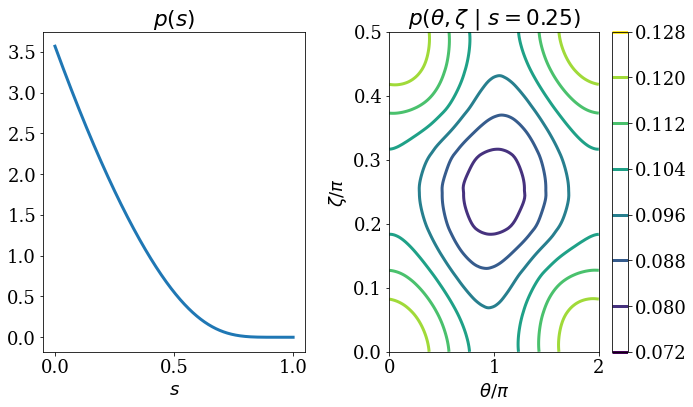

In [98]:
fig,(ax1,ax2) = plt.subplots(figsize=(10,6), ncols=2)

cont = ax2.contour(thetas/np.pi,zetas/np.pi,detjac,linewidths=3)
plt.colorbar(cont)
ax2.set_xlabel('$\\theta/\pi$')
ax2.set_ylabel('$\zeta/\pi$')
ax2.set_title(f"$p(\\theta,\zeta \ |\  s={s_label})$")

# plot the radial density
n_points = 1000
sampler = RadialDensity(n_points)

# plot the pdf
x = np.linspace(0,1,1000)
y = sampler._pdf(x)
ax1.plot(x,y,linewidth=3)
ax1.set_title("$p(s)$")
ax1.set_xlabel("$s$")
plt.tight_layout()
